**Importing dependecies**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**----- DATA ANALYSIS -----**

**Reading the file and Initial Data Analysis**

In [156]:
dataset = pd.read_csv("DigitalAd_dataset.csv")

In [157]:
dataset.head() #gives 1st 5 rows

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [158]:
dataset.shape #give dimensions of the dataset

(400, 3)

In [159]:
dataset.describe() #gives statistical values of the dataset

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [160]:
dataset.info() #gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


**Separating the training features and the target feature**

In [161]:
X = dataset.iloc[:,:-1] #Separating the 1st 2 features
Y = dataset["Status"] #Separating the target feature(3rd feature)

**Analysis of the above separation**

In [162]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


In [163]:
print(X)

     Age  Salary
0     18   82000
1     29   80000
2     47   25000
3     45   26000
4     46   28000
..   ...     ...
395   35   65000
396   26   80000
397   26   52000
398   20   86000
399   32   18000

[400 rows x 2 columns]


In [164]:
print(Y)

0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64


**Visualizing the data using 3D Scatter Plot**

Text(0.5, 0, 'status')

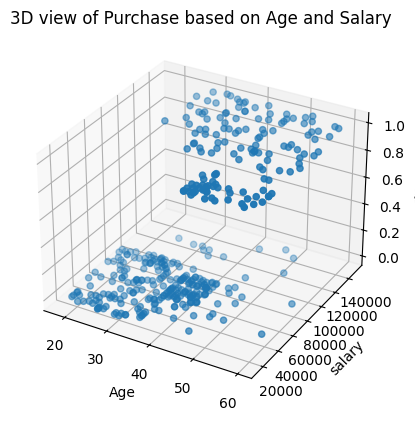

In [ ]:
fig = plt.figure() #creates an empty figure window
plot = fig.add_subplot(111, projection="3d") #adds an empty 3d subplot
plot.scatter(dataset['Age'], dataset["Salary"], dataset["Status"]) #plotting the data into the subplot
plt.title("3D view of Purchase based on Age and Salary") #setting Title for the graph
plot.set_xlabel("Age") #sets X label
plot.set_ylabel("salary") #sets Y label
plot.set_zlabel("status") #sets Z label

**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) #Splitting the data(80% for train, 20% for test)

**Analysing the splitted data**

In [167]:
print(X_train.shape) #finding dimensions of the splitted data
print(X_test.shape)

(320, 2)
(80, 2)


In [168]:
print(Y_train.shape)
print(Y_test.shape)

(320,)
(80,)


**Scaling the data with StandardScalar**

In [169]:
sc = StandardScaler() #intialising the scalar
X_train_transformed = sc.fit_transform(X_train) #fitting & transforming the data into feature vectors
X_test_transformed = sc.transform(X_test) #transforming the data into feature vectors

**Initializing the model and training it**

In [170]:
model = LogisticRegression(random_state=2) #Initalizing the model
model.fit(X_train_transformed, Y_train) #Training the model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**----- MODEL EVALUATION ----**

**Prediction for test data**

In [171]:
y_pred = model.predict(X_test_transformed) #Prediction of test data
# print(y_pred)

**Finding Accuracy on training and test data**

In [172]:
X_train_prediction = model.predict(X_train_transformed)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Training Accuracy: ", training_data_accuracy)

Training Accuracy:  0.859375


In [173]:
X_test_prediction = model.predict(X_test_transformed)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Test Accuracy: ", test_data_accuracy)

Test Accuracy:  0.825


**Classification Report**

In [174]:
print("Classification report: ", classification_report(Y_test, X_test_prediction))

Classification report:                precision    recall  f1-score   support

           0       0.85      0.88      0.87        51
           1       0.78      0.72      0.75        29

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.81        80
weighted avg       0.82      0.82      0.82        80



**Model Evaluation using manual inputs**

In [175]:
Age = int(input("Enter the age: "))
Salary = int(input("Enter the salary: "))
new_cust = [[Age, Salary]]       
# print(new_cust)
transformed = sc.transform(new_cust)
predicted = model.predict(transformed)
print(predicted)

if predicted == 1:
    print("The customer will buy the product")
else:
    print("Customer may not buy the product")

[0]
Customer may not buy the product


c:\Users\perug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Confusion Matrix**

In [176]:
CM = confusion_matrix(Y_test, y_pred)
print("confusion_matrix: ")
print(CM)

confusion_matrix: 
[[45  6]
 [ 8 21]]


**Deep checkup between test and predicted data**

In [177]:
for age,salary in zip(y_pred, Y_test):
    print(age, salary)

1 1
0 1
1 1
0 1
0 0
1 1
1 1
1 0
0 0
1 1
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 0
0 0
1 1
0 0
0 0
1 1
0 1
1 0
1 1
0 0
1 1
0 0
0 1
1 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
0 1
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 1
0 0
0 0
1 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0


**---- Thank You! ----**